# Lab 3: Asking a statistical question

## Problem 1

In [78]:
# Imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

In [79]:
# Create our data
mean = 12
sigma = 0.4
bad_data = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
good_data = norm.rvs(loc=mean, scale=sigma, size=100000)
t_data = np.concatenate((good_data, bad_data), axis=None);

### A

1.) Start by exploring the data you have created

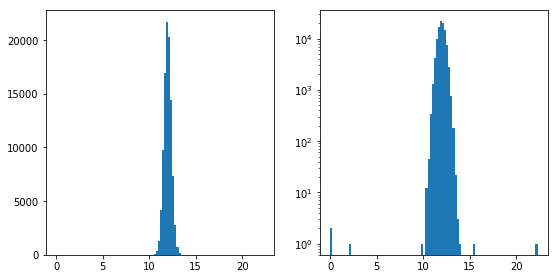

In [80]:
figure = plt.figure(figsize=[9, 4.5])
axes = figure.subplots(1, 2)

axes[0].hist(t_data, bins=100);
axes[1].set_yscale('log')
axes[1].hist(t_data, bins=100);

2.) State the statistical question in words. Be very clear and describe why you have chosen this statistical question.

Given that our expected distribution is a guassian with a mean of 12, and a sigma of 0.4, what are the statistical outlier data points for a cut off sigma of 1.5? This outlier threshold has been chosen arbitrarily. Once the statistical outliers have been discovered, discard that data. If data is not a statistical outlier, include that data.

3.) Restate your question in math. Be very clear.

We want to check the percentile of each data point and find the sigma associated with that percentile. For data points greater than 12, we want to integrate from the data point to infinity. For data points less than 12,  we want to integrate from the data point to negative infinity.

4.) Apply your statisical test and construct a truth table.

In [81]:
# Calculate boundaries of good data with sigma threshold 
threshold = 1.5
upper_boundary = threshold * sigma + mean # calculated by z-score
lower_boundary = -threshold * sigma + mean

# loop through data, place values outside bounds in bad_data
# data in the bounds in good_data
negative_data = []
positive_data = []
for idx in range(0, len(t_data)):
    candidate = t_data[idx]
    if(lower_boundary < candidate < upper_boundary):
        positive_data.append(candidate)
    else:
        negative_data.append(candidate)

# Calculate table
true_positive = len(good_data)
false_negative = len(bad_data)

false_positive = len(positive_data) - len(good_data)
if false_positive < 0:
    false_positive = 0

true_negative = len(negative_data) - len(bad_data)
if true_negative < 0:
    true_negative = 0

print(true_positive)
print(false_negative)
print(false_positive)
print(true_negative)

100000
8
0
13244


### B.

How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predicatble quantity?

It depends on the statistical threshold because if it is outside of the sigma threshold, it will get chopped, even though they might be true values. It is a predictable quantity because I know what percentile my sigma cutoff is, so the amount of data that should be incorrectly thrown out should be 1 - (the percentile cutoff of my upper chosen sigma threshold) + (the percentile cutoff of my lower chosen sigma threshold) percent of the data. 

### C. 

Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

This will be yes if my threshold is greater than 12.7 or less than 10.3. They are avoidable and they depend on what the value of measurement is for the chosen sigma threshold.

## Problem 2

In this example we will be looking for asteroids. If we look at star alignment, we don't get perfect alignment due to a number of factors. The distribution of these discrepancies is a 2d gaussian.

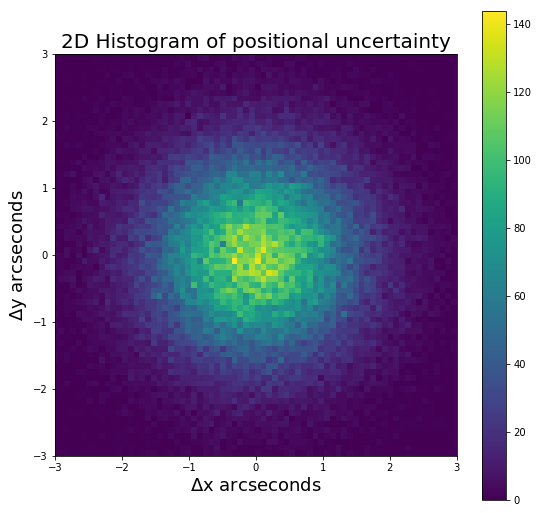

In [83]:
N = 100000
x = stats.norm.rvs( scale = 1, size = N)
y = stats.norm.rvs( scale = 1, size = N)
#r = np.sqrt(x*x + y*y)
#index = round(N -N/3.5/1e6)
# print(index, r(index))
coords = np.vstack((x, y))
coords.shape
fig = plt.figure(figsize=(9, 9))
ax = fig.subplots(1, 1)
h = ax.hist2d(coords[0,:], coords[1,:], bins=100);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 20)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax);

If I have a potential asteroid, it will have some true movement between the images. We would like a 5 sigma detection of movement. What is that distance in arcseconds?

1.) What is the question in words?

What is a 5 sigma percentile movement of the probability distribution of the RMS of the change in x and y arcseconds?

2.) What is the question in math?